# Final assignment 

### Dataset Used

[Average Ambulance Response Time](https://data.ontario.ca/dataset/land-ambulance-response-time-standard-response-times/resource/be860641-c550-47f0-8544-fb56f52114ae)

The dataset I picked for this project is the public posting of legislated response time reports for every upper-tier municipality (UTM) and land ambulance communication service, referred to as ambulance dispatch centres or Central Ambulance Communication Centres (CACCs), as an indicator of land ambulance performance measurement.

I'm particularly interested in this dataset because every second counts during a medical emergency. It would be insightful to analyze how population, land size, and density correlate with average response times.

In [1]:
%pip install pandas
%pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# load data set
ambulatoryData = pd.read_csv('misc/population_estimates_land_area_population_density_and_average_response_times.csv')

# print first 5 rows as example
ambulatoryData.head()

,Ambulance Service Coverage Area,Reporting Year,Population Estimate,Land Area (km2),Population Density (Per km2),Average Response Time
0,Algoma,2023,43385.0,48587.0,0.9,11 min 46 sec
1,Beausoleil First Nation,2023,644.0,52.0,12.3,8 min 45 sec
2,Brant,2023,149210.0,936.0,159.4,7 min 56 sec
3,Bruce,2023,75409.0,4093.0,18.4,11 min 12 sec
4,Chatham-Kent,2023,107923.0,2471.0,43.7,7 min 25 sec


### Data cleanup

First I want to do some cleanup, such as converting average response time to seconds, instead of minutes & seconds for easier comparison. I had to use regex because some of the data was misformed and was missing spaces between the minutes and seconds :c 

I also removed the rows that have missing response time data

In [3]:
import re

def convert_time_to_seconds(time_str):
    if pd.isna(time_str) or 'min' not in time_str or 'sec' not in time_str:
        return None
    parts = re.split(r'min\s*', time_str)
    # print(parts)
    minutes = int(parts[0])
    seconds = int(parts[1].replace('sec', '').strip())
    # print(minutes, seconds)
    return minutes * 60 + seconds

ambulatoryData['Average Response Time (seconds)'] = ambulatoryData['Average Response Time'].apply(convert_time_to_seconds)

# print head again to check new column added correctly
ambulatoryData.head()

,Ambulance Service Coverage Area,Reporting Year,Population Estimate,Land Area (km2),Population Density (Per km2),Average Response Time,Average Response Time (seconds)
0,Algoma,2023,43385.0,48587.0,0.9,11 min 46 sec,706.0
1,Beausoleil First Nation,2023,644.0,52.0,12.3,8 min 45 sec,525.0
2,Brant,2023,149210.0,936.0,159.4,7 min 56 sec,476.0
3,Bruce,2023,75409.0,4093.0,18.4,11 min 12 sec,672.0
4,Chatham-Kent,2023,107923.0,2471.0,43.7,7 min 25 sec,445.0


In [4]:
# drop rows with missing values
ambulatoryData = ambulatoryData.dropna(subset=['Average Response Time (seconds)'])

### Data exploration  

Below are some basic summary/overview of the data 

In [5]:
# basic metadata info
ambulatoryData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 0 to 506
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ambulance Service Coverage Area  494 non-null    object 
 1   Reporting Year                   494 non-null    int64  
 2   Population Estimate              494 non-null    float64
 3   Land Area (km2)                  494 non-null    float64
 4   Population Density (Per km2)     494 non-null    float64
 5   Average Response Time            494 non-null    object 
 6   Average Response Time (seconds)  494 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 30.9+ KB


In [6]:
ambulatoryData.describe()

,Reporting Year,Population Estimate,Land Area (km2),Population Density (Per km2),Average Response Time (seconds)
count,494.000000,4.940000e+02,494.000000,494.000000,494.00000
mean,2018.997976,2.444302e+05,16543.777328,179.556073,493.91498
std,2.556064,4.386360e+05,58178.749794,573.883034,122.80414
min,2015.000000,6.020000e+02,11.000000,0.200000,245.00000
25%,2017.000000,4.617600e+04,1486.000000,16.350000,402.00000
50%,2019.000000,9.032850e+04,2841.000000,38.900000,466.00000
75%,2021.000000,1.639100e+05,4408.000000,92.900000,546.75000
max,2023.000000,2.988408e+06,406834.000000,4705.900000,909.00000


In [7]:
ambulatoryData['Average Response Time (seconds)'].describe(percentiles=[0.01,0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    494.00000
mean     493.91498
std      122.80414
min      245.00000
1%       308.58000
5%       354.00000
10%      372.30000
25%      402.00000
50%      466.00000
75%      546.75000
90%      672.00000
95%      730.50000
99%      876.28000
max      909.00000
Name: Average Response Time (seconds), dtype: float64

Then, I want to compute the correlations between the columns to get a better understanding of their relationships. e.g. between land area, population size, and response time

In [8]:
correlation_matrix = ambulatoryData[['Population Estimate', 'Land Area (km2)', 'Population Density (Per km2)', 'Average Response Time (seconds)']].corr()
print(correlation_matrix)

                                 Population Estimate  Land Area (km2)  \
Population Estimate                         1.000000        -0.098583   
Land Area (km2)                            -0.098583         1.000000   
Population Density (Per km2)                0.903966        -0.081820   
Average Response Time (seconds)            -0.234536         0.293113   

                                 Population Density (Per km2)  \
Population Estimate                                  0.903966   
Land Area (km2)                                     -0.081820   
Population Density (Per km2)                         1.000000   
Average Response Time (seconds)                     -0.176135   

                                 Average Response Time (seconds)  
Population Estimate                                    -0.234536  
Land Area (km2)                                         0.293113  
Population Density (Per km2)                           -0.176135  
Average Response Time (seconds)         

### Data visualization 

Below are some visualizations that I feel will give a good quick overview of the data.

First is a histogram of all the Average Response Times, and their frequency of appearance in the data 

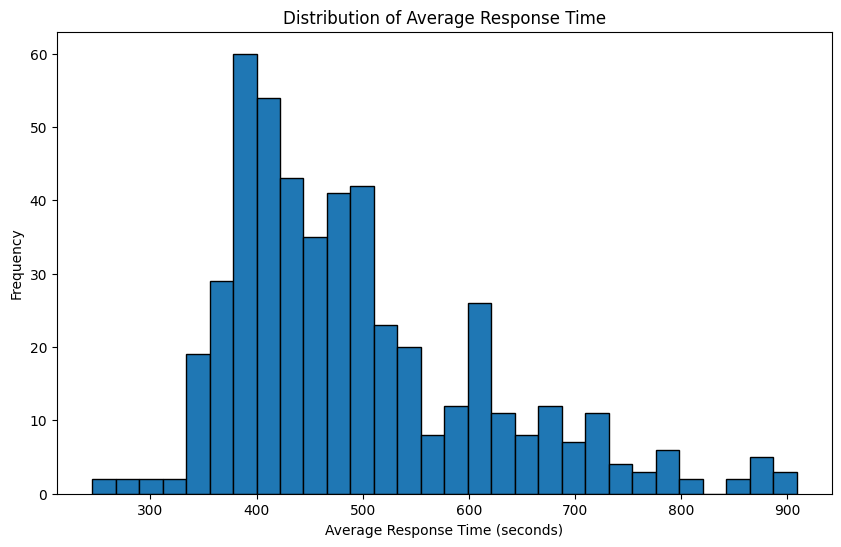

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(ambulatoryData['Average Response Time (seconds)'], bins=30, edgecolor='k')
plt.title('Distribution of Average Response Time')
plt.xlabel('Average Response Time (seconds)')
plt.ylabel('Frequency')
plt.show()

Next are two scatter plot of: 
- Land Area vs. Average Response Time
- Population Density vs. Average Response Time

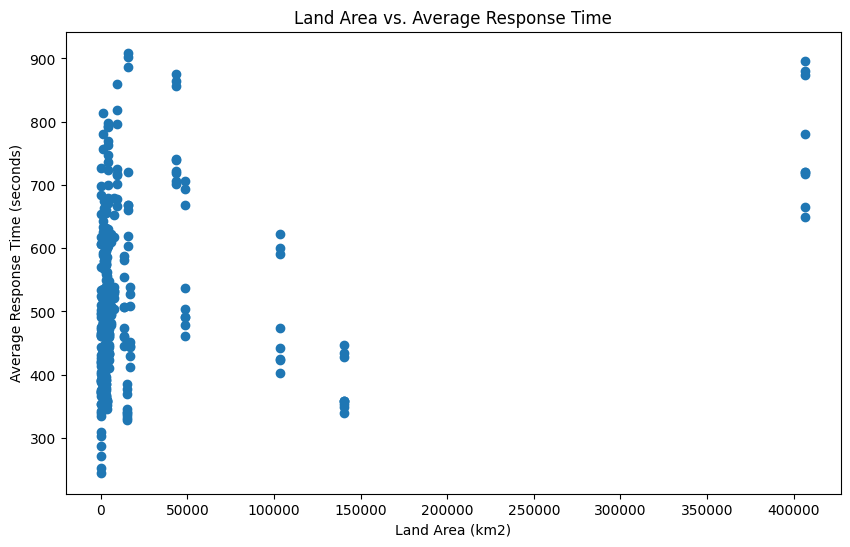

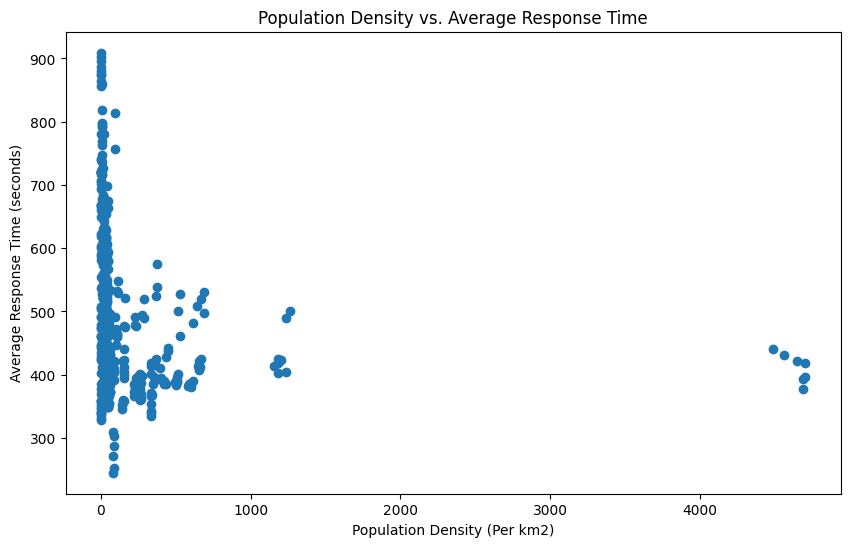

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data=ambulatoryData, x='Land Area (km2)', y='Average Response Time (seconds)')
plt.title('Land Area vs. Average Response Time')
plt.xlabel('Land Area (km2)')
plt.ylabel('Average Response Time (seconds)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data=ambulatoryData, x='Population Density (Per km2)', y='Average Response Time (seconds)')
plt.title('Population Density vs. Average Response Time')
plt.xlabel('Population Density (Per km2)')
plt.ylabel('Average Response Time (seconds)')
plt.show()

Lastly, is the Average Response Time by Population Density ranges. Here, we can see that lower population density regions have a greater range in response times

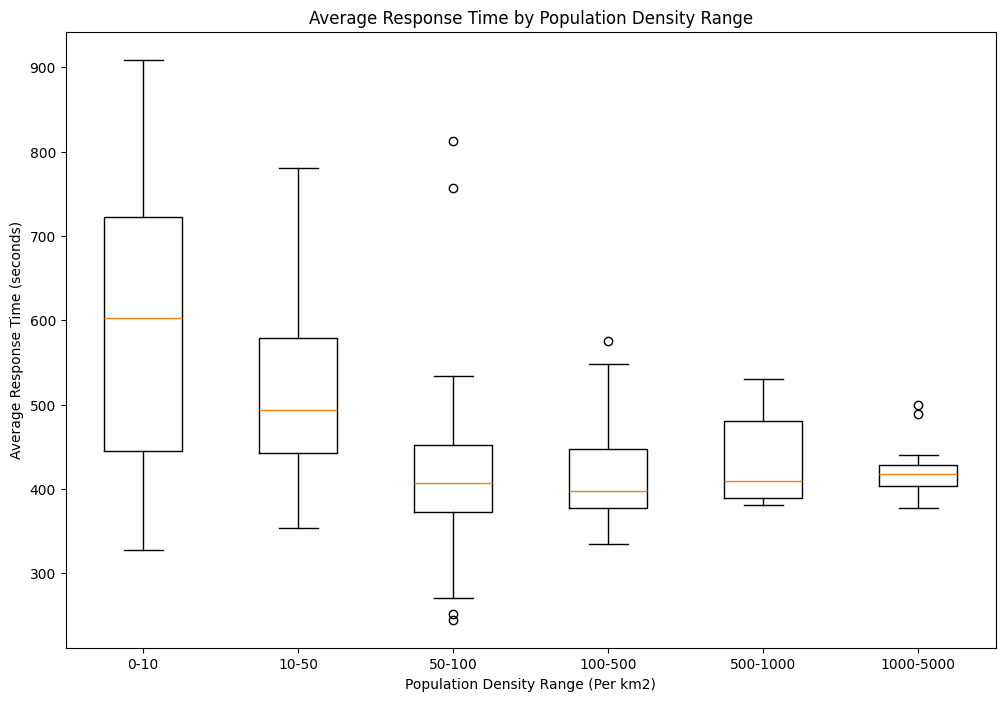

In [11]:
ambulatoryData['Population Density Range'] = pd.cut(ambulatoryData['Population Density (Per km2)'], bins=[0, 10, 50, 100, 500, 1000, 5000], labels=['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000'])
data_to_plot = [ambulatoryData[ambulatoryData['Population Density Range'] == label]['Average Response Time (seconds)'].dropna() for label in ambulatoryData['Population Density Range'].cat.categories]

plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, tick_labels=ambulatoryData['Population Density Range'].cat.categories)
plt.title('Average Response Time by Population Density Range')
plt.xlabel('Population Density Range (Per km2)')
plt.ylabel('Average Response Time (seconds)')
plt.show()

The data shows that, on average, response times across most regions fall within 650 seconds (10 minutes and 50 seconds). While there is a slight trend of decreasing response time as land size increases, the correlation is weak due to significant variation within that range. However, there is a clearer pattern of faster response times in areas with higher population density. One missing but potentially valuable data point is the density of hospitals and healthcare facilities—regions with more resources may naturally experience quicker response times.